## **Partie I**
## Objectif de la partie I : Développer la Descente de Gradient sur un modèle de régression linéaire simple from scratch

On va travailler sur un modèle linéaire simple. Du coup, on va utiliser la fonction f(x) = ax+b.

## *Question 1*

 la fonction du coût utilisé afin de calculer les erreurs pour le cas de f(x) = ax+b
# J(w,b) = 1/2m Sum ((wx+b - y)^2)

## *Question 2*

In [2]:
# La fonction compute_error_for_line_given_point calcule l'erreur quadratique moyenne d'une ligne de régression linéaire pour un ensemble de points donné.
# Les paramètres b et w représentent respectivement le biais et le poids de la régression.
# Le paramètre points est un tableau NumPy contenant les coordonnées x et y de chaque point du dataset.

import numpy as np
import matplotlib.pyplot as plt

def compute_error_for_line_given_point(b,w,points):
    totalerror=0                        # Initialisation de l'erreur totale à 0
    for i in range(0,len(points)):      #Parcours de chaque point dans l'ensemble de données
        x=points[i,0]                   ##Récupération des coordonnées x et y du point actuel
        y=points[i,1]

        totalerror+=(y-(w*x+b))**2  # Calcul de la prédiction de la régression linéaire pour le point actuel prediction = w * x + b
                                    # Calcul de l'erreur au carré entre la valeur réelle y et la prédiction  error = (y - prediction) ** 2
                                    # Ajout de l'erreur au total de l'erreur   total_error += error
    
    return totalerror/(2*float(len(points))) ## Calcul de l'erreur quadratique moyenne en divisant le total de l'erreur par deux fois le nombre de points(exemples)

## *Question 3*

In [3]:
#
def step_gradent(b_current,w_current,points,learnrate):
    b_gradient=0               #Initialisation du gradient pour le biais
    w_gradient=0              # Initialisation du gradient pour le poids
    N=float(len(points))      # Nombre total de points(exemples) dans le dataset

    # Calcul du gradient pour chaque point dans le dataset
    for i in range(0,len(points)):
        x=points[i,0]          #Coordonnée x du point actuel
        y=points[i,1]          # Coordonnée y du point actuel 

        
        b_gradient+=(1/N)*((w_current*x+b_current)-y)   # Calcul du gradient pour le biais
        w_gradient+=(1/N)*x*((w_current*x+b_current)-y) # Calcul du gradient pour le poids
    #renew
    # Mise à jour des valeurs de biais et de poids
    new_b=b_current-(learnrate*b_gradient)
    new_w=w_current-(learnrate*w_gradient)
    return [new_b,new_w]

## *Question 4*

In [4]:
def gradient_descent_runner(points,starting_b,starting_w,learning_rate,num_iteration):
    b=starting_b  # Initialisation du biais
    w=starting_w  # Initialisation du poids
    cost_history = np.zeros(num_iteration)  # Initialisation du tableau pour stocker l'historique des coûts
                                            # np.zeros(num_iterations) crée un tableau de longueur num_iterations rempli de zéros.
                                            # Ce tableau est utilisé pour stocker l'historique des coûts à chaque itération de la descente de gradient.
                                            # Chaque élément du tableau représente le coût de la fonction pour une itération spécifique.

    # Boucle pour effectuer les itérations de la descente de gradient
    for i in range(num_iteration):
        b,w=step_gradent(b,w,np.array(points),learning_rate) # Calcul de la nouvelle valeur de b et w en utilisant la fonction step_gradient(Question 3)

        # Affichage des informations sur l'itération actuelle
        print("Iteration Numero :",i)
        print("Fonction du cout = ", compute_error_for_line_given_point(b,w,np.array(points)))# Cette ligne affiche le coût actuel de la fonction d'erreur pour les paramètres biais (b) et poids (w) actuels,
        
        # Calcul et stockage du coût actuel dans l'historique des coûts
        cost_history[i] = compute_error_for_line_given_point(b,w,np.array(points))

         # Affichage des nouvelles valeurs de b et w
        print("w=", w)
        print("b=", b)
    plt.plot(range(num_iteration), cost_history) # Cette ligne crée un graphique pour visualiser l'évolution du coût (ou de l'erreur) au fil des itérations
    plt.show()
   
    return [b,w] 

## *Question 5*

Iteration Numero : 0
Fonction du cout =  18.42751332832884
w= 0.0037136363636363777
b= 0.0005500000000000077
Iteration Numero : 1
Fonction du cout =  18.287910623990804
w= 0.0074131791322313775
b= 0.0010979025000000145
Iteration Numero : 2
Fonction du cout =  18.14936563015881
w= 0.0110986817978972
b= 0.0016437154612272851
Iteration Numero : 3
Fonction du cout =  18.011870333005746
w= 0.014770197649716805
b= 0.0021874468146923197
Iteration Numero : 4
Fonction du cout =  17.87541677941964
w= 0.0184277797745151
b= 0.0027291044613035045
Iteration Numero : 5
Fonction du cout =  17.739997076546935
w= 0.02207148105762604
b= 0.0032686962719813807
Iteration Numero : 6
Fonction du cout =  17.605603391335425
w= 0.02570135418365785
b= 0.0038062300877724836
Iteration Numero : 7
Fonction du cout =  17.47222795008109
w= 0.02931745163725474
b= 0.004341713719962713
Iteration Numero : 8
Fonction du cout =  17.339863037976706
w= 0.032919825703855744
b= 0.004875154950190232
Iteration Numero : 9
Fonction 

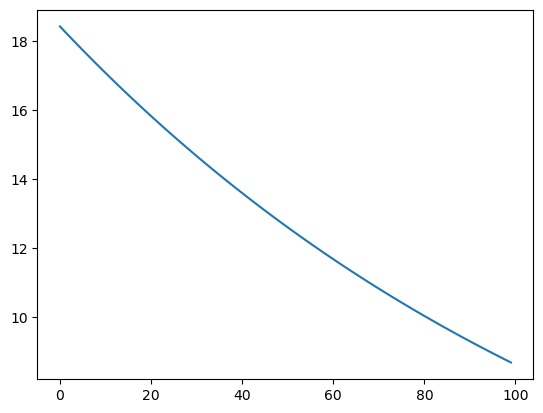

last_b= 0.045794359612294215
last_w= 0.30950859314820856


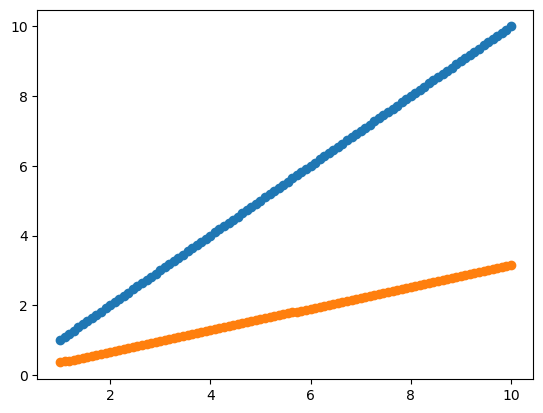

In [5]:
# Hyperparameter : learning_rate = 0.0001 et nombre_itération = 100 :
# Fonction principale pour exécuter l'algorithme de régression linéaire
def run():
      
    # Initialize one hundred points
    x=np.linspace(1,10,100)  #Ces lignes utilisent la fonction np.linspace de NumPy pour générer un tableau de 100 valeurs 
    y=np.linspace(1,10,100)    #régulièrement espacées entre 1 et 10 inclusivement.

    array=[]

    for i in np.arange(100):
        for j in np.arange(100):
              # Pour chaque valeur de i et j, crée une paire [x[i], y[j]]
            p=[x[i],y[i]]
             # Ajoute cette paire à la liste array
            array.append(p)

# Hyperparamètres de descente de gradient
    learning_rate=0.0001
    init_b=0
    init_w=0
    num_iteration=100

     # Exécution de la descente de gradient
    [b,w]=gradient_descent_runner(array,init_b,init_w,learning_rate,num_iteration)

     # Visualisation des résultats
    plt.figure()

     # Affichage des points de données originaux
    plt.scatter(x, y)

     # Calcul des valeurs prédites pour la régression linéaire
    y2=b+w*x

     # Affichage des valeurs prédites
    plt.scatter(x,y2)
    
     # Affichage des dernières valeurs de biais et de poids
    print("last_b=", b)
    print("last_w=", w)

if __name__=="__main__":
    run()

## *Question 6*

Iteration Numero : 0
Fonction du cout =  17.185568370069728
w= 0.03713636363636377
b= 0.005500000000000078
Iteration Numero : 1
Fonction du cout =  15.905917097230317
w= 0.07286336776859562
b= 0.01079025000000011
Iteration Numero : 2
Fonction du cout =  14.721560480612396
w= 0.10723450450873484
b= 0.0158787112272728
Iteration Numero : 3
Fonction du cout =  13.625401995791101
w= 0.14030123567954647
b= 0.020773042741247496
Iteration Numero : 4
Fonction du cout =  12.610873591403264
w= 0.17211306987400704
b= 0.02548061290226879
Iteration Numero : 5
Fonction du cout =  11.671896334144794
w= 0.20271763658999642
b= 0.030008510405059537
Iteration Numero : 6
Fonction du cout =  10.802843984497086
w= 0.23216075755122187
b= 0.03436355489340955
Iteration Numero : 7
Fonction du cout =  9.998509284948872
w= 0.26048651532115547
b= 0.03855230717198442
Iteration Numero : 8
Fonction du cout =  9.254072758707302
w= 0.28773731931273794
b= 0.04258107903054609
Iteration Numero : 9
Fonction du cout =  8.565

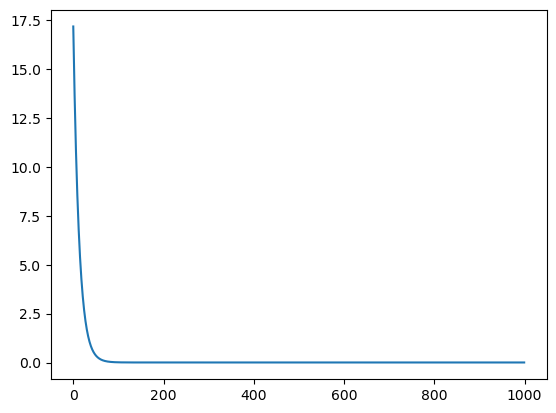

last_b= 0.12144287650028862
last_w= 0.9819256632135951


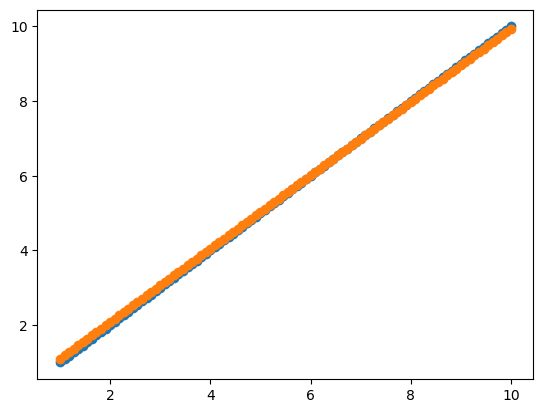

In [6]:
# Optimal Hyperparameter : learning_rate = 0.001 et nombre_itération = 1000 :

def run():

    # Initialize one hundred points
    x=np.linspace(1,10,100)
    y=np.linspace(1,10,100)

    array=[]

    for i in np.arange(100):
        for j in np.arange(100):
            p=[x[i],y[i]]
            array.append(p)


    learning_rate=0.001
    init_b=0
    init_w=0
    num_iteration=1000

    [b,w]=gradient_descent_runner(array,init_b,init_w,learning_rate,num_iteration)

    plt.figure()

    plt.scatter(x, y)
    y2=b+w*x

    plt.scatter(x,y2)
    print("last_b=", b)
    print("last_w=", w)

if __name__=="__main__":
    run()

## **Partie II**

## *Question 1*

In [7]:
##Etape 1 : Importer les librairies:

import numpy as np                          #Numpy pour manipuler notre Dataset en tant que matrice
import matplotlib.pyplot as plt             #Matplotlib.pyplot pour visualiser nos donnees
from sklearn.datasets import make_regression #La fonction make regression de Sklearn pour generer un nuage depoint
from sklearn.linear_model import SGDRegressor 

## *Question 2*

In [8]:
##Etape 2 : Creer un Dataset
#nous n’allons pas importer de donnees personnelles. Plutˆot, nous allons generer un tableau de donnees (x, y)aleatoires
# la fonction make regression est tres utile. La fonction prend comme arguments le nombre d’echantillons a generer, le nombre de variables et le bruit
#puis nous retourne deux vecteurs x et y.
#Pour maitriser l’aleatoire, on ecrit la ligne np.random.seed(0).

np.random.seed(0)
x, y=make_regression(n_samples=170, n_features=1, noise=20)

## *Question 3*

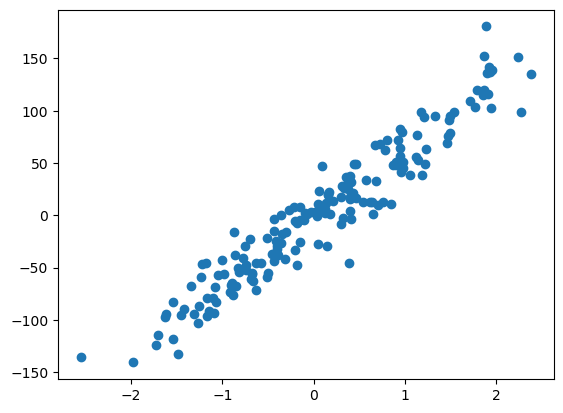

In [9]:
#pour visualiser nos donnees on utilise la fonction plt.scatter(x, y).
plt.scatter(x,y)

## *Question 4*

In [10]:
##Etape 3 : Developper le modele et l’entrainer
# Crée un modèle de régression linéaire avec descente de gradient stochastique (SGD)
# max_iter=100 : Définit le nombre maximal d'itérations pour l'apprentissage. Une itération correspond à une mise à jour des paramètres du modèle.
# eta0=0.0001 : Définit le taux d'apprentissage initial pour SGD. C'est la taille du pas utilisée pour mettre à jour les paramètres lors de chaque itération.

model = SGDRegressor(max_iter=100, eta0=0.0001)

## *Question 5*

In [11]:
 #Une fois le modele defini, il vous faut l’entraıner. Pour cela, il suffit d’utiliser la fonction fit

model.fit(x,y)

C:\Users\AdMin\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(eta0=0.0001, max_iter=100)

## *Question 6*

In [12]:
#Nous pouvons maintenant observez la precision de notre modele en
#utilisant la fonction score qui calcule le coefficient de determination entre le modele et les valeurs y de notre Dataset
print("coefficient de determination = ",model.score(x,y))


coefficient de determination =  0.31268560491703556


## *Question 7*

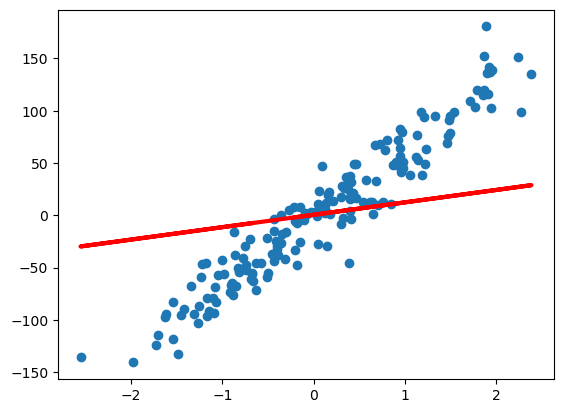

In [13]:
#On peut aussi utiliser notre modele pour faire de nouvelles predictions
#avec la fonction predict et tracer ces resultats avec la fonction plt.plot
plt.scatter(x,y)
plt.plot(x, model.predict(x), color="red", lw=3)

## *Question 8*

coefficient de determination =  0.9198945444251341


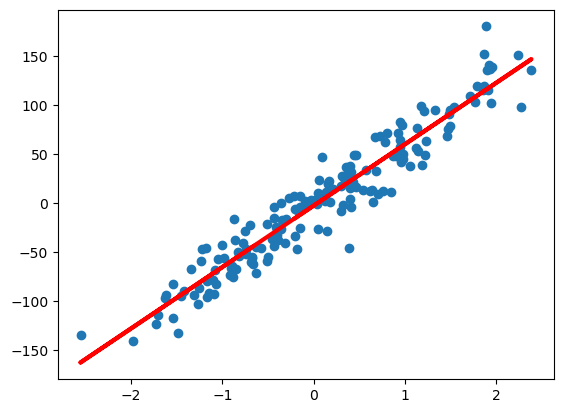

In [14]:
# Le modèle initial créé avec SGDRegressor et des hyperparamètres (eta0=0.0001,max_iter=1000) ne donne pas de bons résultats,
#probablement en raison d'une durée d'entraînement insuffisante et d'un taux d'apprentissage trop faible . 
#Pour améliorer la performance, un nouveau modèle a été créé avec des hyperparamètres modifiés, 
#tels qu'une limite d'itérations maximale plus élevée et un taux d'apprentissage initial plus élevé.

model = SGDRegressor(max_iter=1000, eta0=0.001)
model.fit(x,y)
print("coefficient de determination = ",model.score(x,y))
plt.scatter(x,y)
plt.plot(x, model.predict(x), color="red", lw=3)

## *Question 9*